In [1]:
import numpy as np

In [2]:
file_txt_labels = "/home/abhishek/Desktop/RUG/hw_recognition/IAM-data/iam_lines_gt.txt"

In [3]:
file_handler = open(file_txt_labels, mode="r")

In [4]:
all_lines = file_handler.readlines()

In [5]:
all_lines[0].strip()

'a03-017-07.png'

In [6]:
num_lines = len(all_lines)

In [7]:
num_lines

22373

In [8]:
image_files = []
groundtruth = []

In [9]:
for cur_line_num in range(num_lines):
    if cur_line_num % 3 == 0:
        image_files.append(all_lines[cur_line_num].strip())
    elif cur_line_num %3 == 1:
        groundtruth.append(all_lines[cur_line_num].strip())
    else:
        continue

In [10]:
image_files[0:4]

['a03-017-07.png', 'a03-017-05.png', 'a03-017-08.png', 'a03-017-02.png']

In [11]:
groundtruth[0:4]

['into the pro-communist north and the',
 'to 1958 kept the kingdom in peace, though',
 'pro-western centre and south.',
 'in Phnom Penh indicate that he still regards']

In [12]:
all_lines[0:12]

['a03-017-07.png\n',
 'into the pro-communist north and the\n',
 '\n',
 'a03-017-05.png\n',
 'to 1958 kept the kingdom in peace, though\n',
 '\n',
 'a03-017-08.png\n',
 'pro-western centre and south.\n',
 '\n',
 'a03-017-02.png\n',
 'in Phnom Penh indicate that he still regards\n',
 '\n']

In [13]:
len(groundtruth)

7458

In [14]:
len(image_files)

7458

In [15]:
from PIL import Image

In [16]:
im = Image.open("/home/abhishek/Desktop/RUG/hw_recognition/IAM-data/img/a01-000u-00.png")

In [17]:
im.size

(1661, 89)

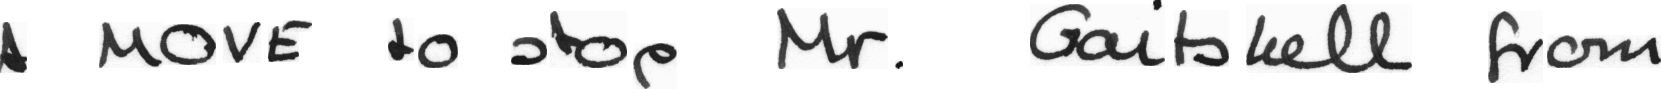

In [18]:
im

In [19]:
im_resized = im.resize((768, 64))

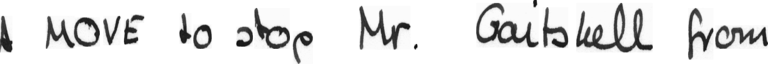

In [20]:
im_resized

In [21]:
import os

In [22]:
from dataset import get_dataloader_for_testing, split_dataset

In [23]:
train_x, valid_x, train_y, valid_y = split_dataset(file_txt_labels, for_train=True)
test_loader = get_dataloader_for_testing(valid_x, valid_y, os.path.join(os.path.dirname(file_txt_labels), "img"))

/home/abhishek/.local/lib/python3.8/site-packages/torchvision/transforms/transforms.py:332: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  warnings.warn(


In [24]:
import matplotlib.pyplot as plt

torch.Size([1, 3, 64, 768])


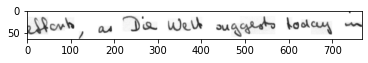

In [25]:
for x, y, y_len in test_loader:
    print(x.shape)
    plt.imshow(np.transpose(np.squeeze(x.detach().cpu().numpy()), (1, 2, 0)))
    break